# Principle Component Analysis
used to reduce the dimention of the dataset 

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [122]:
HMEQ=pd.read_csv(r'C:\Users\Maryam\Downloads\DATA1.csv')

In [123]:
HMEQ.head()

,Default,Loan,Mortgage,Value,Reason,Job,YOJ,Derogatories,Delinquencies,CLAGE,Inquiries,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [124]:
HMEQ.dtypes

Default            int64
Loan               int64
Mortgage         float64
Value            float64
Reason            object
Job               object
YOJ              float64
Derogatories     float64
Delinquencies    float64
CLAGE            float64
Inquiries        float64
CLNO             float64
DEBTINC          float64
dtype: object

In [125]:
HMEQ.isna().sum()

Default             0
Loan                0
Mortgage          518
Value             112
Reason            252
Job               279
YOJ               515
Derogatories      708
Delinquencies     580
CLAGE             308
Inquiries         510
CLNO              222
DEBTINC          1267
dtype: int64

In [126]:
HMEQ.describe()

,Default,Loan,Mortgage,Value,YOJ,Derogatories,Delinquencies,CLAGE,Inquiries,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [127]:
HMEQ.shape

(5960, 13)

In [17]:
median.DE=HMEQ['Derogatories'].median()[0]

TypeError: 'float' object is not subscriptable

In [128]:
HMEQ['Derogatories']=HMEQ['Derogatories'].fillna(0)

In [129]:
HMEQ['Derogatories'].isna().sum()

0

In [130]:
HMEQ.Derogatories=HMEQ.Derogatories.astype('float')

In [131]:
HMEQ['Delinquencies']=HMEQ['Delinquencies'].fillna(0)
HMEQ.Delinquencies=HMEQ.Delinquencies.astype('float')
HMEQ['Derogatories'].isna().sum()

0

In [132]:
HMEQ['Inquiries']=HMEQ['Inquiries'].fillna(1)
HMEQ.Inquiries=HMEQ.Inquiries.astype('float')
HMEQ['Inquiries'].isna().sum()

0

In [133]:
HMEQ['CLNO']=HMEQ['CLNO'].fillna(20)
HMEQ.CLNO=HMEQ.CLNO.astype('float')
HMEQ['CLNO'].isna().sum()

0

In [134]:
HMEQ.Default=HMEQ.Default.astype('bool')

In [135]:
HMEQ['Mortgage']=HMEQ['Mortgage'].fillna(HMEQ['Mortgage'].mean())

In [136]:
HMEQ['Value']=HMEQ['Value'].fillna(HMEQ['Value'].mean())


In [137]:
HMEQ['YOJ']=HMEQ['YOJ'].fillna(HMEQ['YOJ'].mean())

In [138]:
HMEQ['CLAGE']=HMEQ['CLAGE'].fillna(HMEQ['CLAGE'].mean())

In [139]:
HMEQ['CLAGE'].mean()

179.7662751865659

In [140]:
HMEQ['DEBTINC']=HMEQ['DEBTINC'].fillna(HMEQ['DEBTINC'].mean())

In [141]:
HMEQ.head()

,Default,Loan,Mortgage,Value,Reason,Job,YOJ,Derogatories,Delinquencies,CLAGE,Inquiries,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0,0,94.366667,1,9,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0,2,121.833333,0,14,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0,0,149.466667,1,10,33.779915
3,1,1500,73760.8172,101776.048741,NaN,NaN,8.922268,0,0,179.766275,1,20,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0,0,93.333333,0,14,33.779915


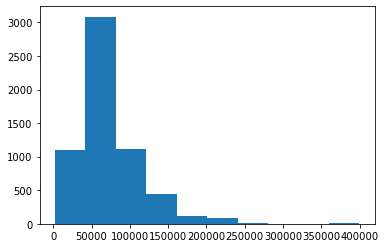

In [142]:
plt.hist(HMEQ['Mortgage'])
plt.show()

In [143]:
HMEQ['Job']=HMEQ['Job'].fillna(HMEQ['Job'].mode()[0])

In [144]:
HMEQ['Job'].mode()[0]

'Other'

In [145]:
HMEQ['Reason']=HMEQ['Reason'].fillna(HMEQ['Reason'].mode()[0])

In [146]:
HMEQ_df = pd.DataFrame(HMEQ, columns=['Job'])

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [147]:
#HMEQ.Job=HMEQ.Job.astype('category')
#from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
#enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
dum_HMEQ = pd.get_dummies(HMEQ_df, columns=["Job"], prefix=["Type_is"] )
HMEQ=HMEQ.join(dum_HMEQ)

In [149]:
HMEQ_df = pd.DataFrame(HMEQ, columns=['Reason'])
dum_HMEQ = pd.get_dummies(HMEQ_df, columns=["Reason"], prefix=["Reason"] )
HMEQ=HMEQ.join(dum_HMEQ)

In [150]:
HMEQ.head()

,Default,Loan,Mortgage,Value,Reason,Job,YOJ,Derogatories,Delinquencies,CLAGE,...,CLNO,DEBTINC,Type_is_Mgr,Type_is_Office,Type_is_Other,Type_is_ProfExe,Type_is_Sales,Type_is_Self,Reason_DebtCon,Reason_HomeImp
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0,0,94.366667,...,9,33.779915,0,0,1,0,0,0,0,1
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0,2,121.833333,...,14,33.779915,0,0,1,0,0,0,0,1
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0,0,149.466667,...,10,33.779915,0,0,1,0,0,0,0,1
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0,0,179.766275,...,20,33.779915,0,0,1,0,0,0,1,0
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0,0,93.333333,...,14,33.779915,0,1,0,0,0,0,0,1


In [160]:
HMEQ=HMEQ.drop(['Job', 'Reason'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'find'

In [166]:
HMEQ_std=pd.DataFrame(StandardScaler().fit_transform(HMEQ))


In [167]:
HMEQ_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.003151,-1.562299,-1.127666,-1.104011e+00,2.179581e-01,-0.280976,-0.375943,-1.022064e+00,-0.102879,-1.230878,1.210295e-14,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,-1.532421,1.532421
1,2.003151,-1.544453,-0.087288,-5.872016e-01,-2.655546e-01,-0.280976,1.477341,-6.933423e-01,-0.707574,-0.728389,1.210295e-14,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,-1.532421,1.532421
2,2.003151,-1.526606,-1.418642,-1.496786e+00,-6.799940e-01,-0.280976,-0.375943,-3.626262e-01,-0.102879,-1.130380,1.210295e-14,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,-1.532421,1.532421
3,2.003151,-1.526606,0.000000,-2.560192e-16,9.815897e-16,-0.280976,-0.375943,7.483332e-15,-0.102879,-0.125403,1.210295e-14,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,0.652562,-0.652562
4,-0.499213,-1.508759,0.565923,1.798751e-01,-8.181404e-01,-0.280976,-0.375943,-1.034431e+00,-0.707574,-0.728389,1.210295e-14,-0.384316,2.299330,-0.899944,-0.521936,-0.136489,-0.182938,-1.532421,1.532421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,-0.499213,6.272411,-0.388363,-2.039272e-01,9.777637e-01,-0.280976,-0.375943,5.031646e-01,-0.707574,-0.527394,3.056091e-01,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,0.652562,-0.652562
5956,-0.499213,6.281335,-0.451643,-1.555098e-01,9.777637e-01,-0.280976,-0.375943,3.461843e-01,-0.707574,-0.627892,2.725413e-01,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,0.652562,-0.652562
5957,-0.499213,6.299181,-0.464144,-1.557385e-01,8.396172e-01,-0.280976,-0.375943,3.891211e-01,-0.707574,-0.627892,2.327906e-01,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,0.652562,-0.652562
5958,-0.499213,6.352722,-0.550659,-1.744404e-01,7.014707e-01,-0.280976,-0.375943,4.084257e-01,-0.707574,-0.527394,7.350127e-02,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938,0.652562,-0.652562


<AxesSubplot:xlabel='0', ylabel='Density'>

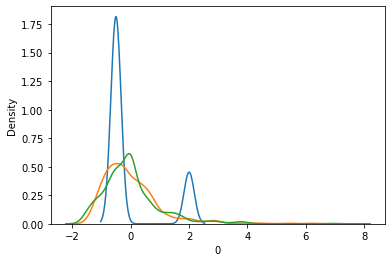

In [169]:
import seaborn as sb
sb.kdeplot(HMEQ_std[0])
sb.kdeplot(HMEQ_std[1])
sb.kdeplot(HMEQ_std[2])

# covariance Marix

In [183]:
mean_vec=np.mean(HMEQ_std,axis=0)
mean_vec
cov_mat=(HMEQ_std-mean_vec).T.dot((HMEQ_std-mean_vec))/(HMEQ_std.shape[0]-1)

In [184]:
print('Covariance Matrix  \n%s' %cov_mat)

Covariance Matrix  
          0         1         2         3         4         5         6   \
0   1.000168 -0.075112 -0.046041 -0.028857 -0.058324  0.269967  0.346561   
1  -0.075112  1.000168  0.216136  0.331918  0.100681  0.006997 -0.028874   
2  -0.046041  0.216136  1.000168  0.779918 -0.082870 -0.046483  0.000542   
3  -0.028857  0.331918  0.779918  1.000168  0.007383 -0.040734 -0.003615   
4  -0.058324  0.100681 -0.082870  0.007383  1.000168 -0.056255  0.046655   
5   0.269967  0.006997 -0.046483 -0.040734 -0.056255  1.000168  0.171315   
6   0.346561 -0.028874  0.000542 -0.003615  0.046655  0.171315  1.000168   
7  -0.165141  0.086888  0.130779  0.167966  0.190969 -0.080158  0.024878   
8   0.170059  0.045274  0.030050 -0.002251 -0.066218  0.146614  0.059204   
9  -0.004543  0.074330  0.305858  0.265134  0.024744  0.052084  0.161180   
10  0.124345  0.074836  0.128347  0.115815 -0.047650  0.010746  0.035358   
11  0.032588  0.018773  0.074406  0.045251  0.020152  0.031347  0.05

In [186]:
cov_mat=np.cov(HMEQ_std.T)
eig_vals, eig_vecs=np.linalg.eig(cov_mat)
print('EigenVectors\n%s' %eig_vecs)
print('EigenValues\n%s' %eig_vecs)

EigenVectors
[[-5.96793115e-02  6.48530030e-02  5.58836205e-01 -4.40900745e-02
   1.17376714e-02  6.20175475e-01  9.99449533e-02 -6.89108846e-02
  -3.58418571e-01 -1.14438955e-01 -9.87205557e-02  6.14469495e-02
   9.64655077e-02 -1.36429975e-01  1.08883902e-01  2.60723204e-01
  -1.25159437e-01  8.08424036e-17 -1.21018109e-17]
 [ 2.58132414e-01  9.64461882e-02 -6.16029549e-02 -1.08050803e-01
  -2.86599345e-01  2.01575715e-01 -2.04566880e-01  2.86025017e-01
   4.24545298e-01 -4.72357016e-01 -7.97520987e-02  2.89129146e-01
   1.71811339e-01  1.45665436e-01  1.69670382e-01 -8.19248212e-02
  -2.87424470e-01  1.46997569e-16  1.05356819e-16]
 [ 4.98364856e-01 -7.44984131e-02  4.79606017e-02 -6.83186041e-01
  -1.45910046e-01 -1.11389014e-01 -1.37302135e-01 -1.09873425e-01
  -1.25467828e-01  1.85918029e-01  1.35621814e-02 -8.64458808e-02
  -9.71684138e-02 -1.99557609e-01 -2.48704244e-01  8.91061148e-02
  -1.88134574e-01 -1.23272102e-16  4.04300137e-16]
 [ 5.07627175e-01 -9.96669479e-02  3.07368

In [197]:
for i in range(len(eig_vals)):
#print('Eigenvalues in decending order:')
#for i in eig_pairs:
    #print(eig_vecs[:,i])
    print(np.array(np.abs(eig_vals(i))))

TypeError: 'numpy.ndarray' object is not callable

In [198]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in decending order:')
for i in eig_pairs:
    print(i[0])
    


Eigenvalues in decending order:
2.5863687534158264
2.1303464447059097
1.7438184037159339
0.20243912046243367
1.3925848548897835
0.5366247262634143
1.2859401856904664
1.2326997543310814
0.6270700510033532
0.668597102183852
1.1333021746268046
1.0756806755117005
1.013321524384488
0.7691001662292929
0.8522288663381474
0.8792863528690738
0.8737792978171218
1.279454067789331e-15
7.045588517449139e-16


In [199]:
eig_pairs.sort(reverse=True)

In [200]:
eig_pairs

[(2.5863687534158264,
  array([-0.05967931,  0.25813241,  0.49836486,  0.50762717, -0.00070857,
         -0.03867596,  0.03090945,  0.19041916,  0.02098518,  0.3340889 ,
          0.12054051,  0.09830095, -0.01425517, -0.34786651,  0.29460149,
          0.03692481,  0.11003069,  0.11687293, -0.11687293])),
 (2.1303464447059097,
  array([ 0.064853  ,  0.09644619, -0.07449841, -0.09966695, -0.06813388,
          0.09444705,  0.03880631, -0.13158468,  0.2036796 ,  0.05315772,
          0.07672369,  0.08843533, -0.04949986,  0.12348876, -0.13720792,
          0.05727115, -0.13730403,  0.64107301, -0.64107301])),
 (1.7438184037159339,
  array([ 0.55883621, -0.06160295,  0.0479606 ,  0.03073684, -0.13031299,
          0.41263011,  0.42199514, -0.1935506 ,  0.30777113,  0.12052999,
          0.22696507,  0.15043647, -0.108188  , -0.01413981, -0.08299537,
          0.03900135,  0.14146893, -0.16454966,  0.16454966])),
 (1.3925848548897835,
  array([ 0.01173767, -0.28659935, -0.14591005, -0.193

In [201]:
from sklearn.decomposition import PCA

In [203]:
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [204]:
pca.fit_transform(HMEQ)
print(pca.explained_variance_ratio_)

[0.88031952 0.09832966]


In [207]:
pca =PCA().fit(HMEQ_std)
pca

PCA()

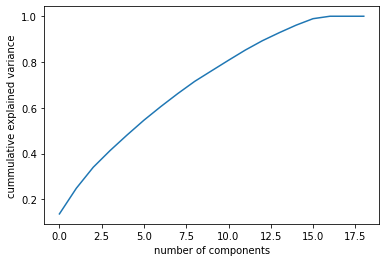

In [210]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
plt.show()

In [212]:
print(pca(1))

TypeError: 'PCA' object is not callable

In [151]:
# Import pandas package 
import pandas as pd
  
# create a dictionary with five fields each
data = {
    'A':['A1', 'A2', 'A3', 'A4', 'A5'], 
    'B':['B1', 'B2', 'B3', 'B4', 'B5'], 
    'C':['C1', 'C2', 'C3', 'C4', 'C5'], 
    'D':['D1', 'D2', 'D3', 'D4', 'D5'], 
    'E':['E1', 'E2', 'E3', 'E4', 'E5'] }
  

In [152]:

# Convert the dictionary into DataFrame 
df = pd.DataFrame(data)
df

,A,B,C,D,E
0,A1,B1,C1,D1,E1
1,A2,B2,C2,D2,E2
2,A3,B3,C3,D3,E3
3,A4,B4,C4,D4,E4
4,A5,B5,C5,D5,E5


In [153]:
  
# Remove two columns name is 'C' and 'D'
df.drop(['C', 'D'], axis = 1)
  
# df.drop(columns =['C', 'D'])

,A,B,E
0,A1,B1,E1
1,A2,B2,E2
2,A3,B3,E3
3,A4,B4,E4
4,A5,B5,E5
